In [1]:
import pandas as pd
import plotly
import mrob
import numpy as np
import scipy
import scipy.signal

import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/nosmokingsurfer/miniconda3/envs/lyft_env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Acceleration along x axis

In [2]:
time = np.arange(0,50, step=0.005)

trajectory = np.zeros((len(time),6 + 3 +3))

trajectory.shape

acc = 0.5 # g's

# acc noise

acc_measurement_noise = scipy.stats.norm(loc=0, scale=0.01).rvs(len(trajectory))


# motion noise
sigma = np.diag([0.1,0.01,0.01,0.1,0.1,0.1])
normal_noise = scipy.stats.multivariate_normal(cov=sigma)
noise = normal_noise.rvs(len(trajectory))




for i in range(len(trajectory)):
    acc_noise = np.random.rand()
    tmp = mrob.geometry.SE3([0,0,0,acc*time[i]**2/2,0,0])
    tmp.update_lhs(noise[i])
    
    trajectory[i][3] = tmp.Ln()[3]
    trajectory[i][6] = acc + acc_measurement_noise[i]

In [3]:
df = pd.DataFrame(trajectory, columns=['yaw', 'pitch','roll','x','y','z','acc_x', 'acc_y', 'acc_z', 'omega_x', 'omega_y','omega_z'])

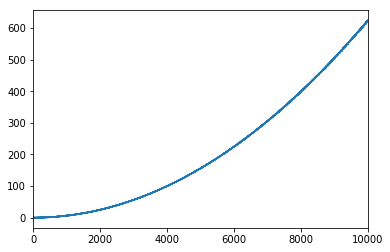

In [4]:
df.x.plot()

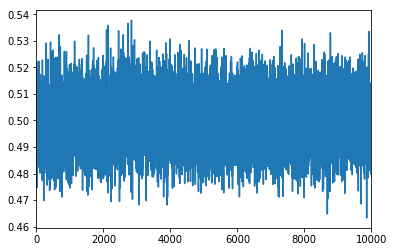

In [5]:
df.acc_x.plot()

In [6]:
df = df.set_index(time)
df.index.name='time[sec]'

In [7]:
len(df)

10000

In [8]:
df.to_csv('acceleration_along_straigt_line.csv')

# Accelerating on a circle

In [9]:
time = np.arange(0,50, step=0.5)
trajectory = np.zeros((len(time),6 + 3 +3))

trajectory.shape

acc = 0.05 # g's
R = 5

# acc noise
acc_measurement_noise_x = scipy.stats.norm(loc=0, scale=0.01).rvs(len(trajectory))
acc_measurement_noise_y = scipy.stats.norm(loc=0, scale=0.01).rvs(len(trajectory))


# motion noise
sigma = np.diag([0.1,0.01,0.01,0.1,0.1,0.1])
normal_noise = scipy.stats.multivariate_normal(cov=sigma)
noise = normal_noise.rvs(len(trajectory))


for i in range(len(trajectory)):
    acc_noise = np.random.rand(1)
    yaw = acc*time[i]**2/(2*R)
    tmp = mrob.geometry.SE3([np.mod(yaw+np.pi,np.pi)-np.pi ,0,0,R*np.cos(yaw),R*np.sin(yaw),0])
#     tmp.update_lhs(noise[i])
    
    trajectory[i][:6] = tmp.Ln()
    
    V = acc*time[i]
    omega = V/R
    
    #acc_x in sensor frame
    trajectory[i][6] = -R*omega**2 + acc_measurement_noise_x[i]
    #acc_y in sensor frame
    trajectory[i][7] = acc + acc_measurement_noise_y[i]
    
    #omega_z
    trajectory[i][11] = acc*time[i]/R

In [10]:
df = pd.DataFrame(trajectory, columns=['yaw', 'pitch','roll','x','y','z','acc_x', 'acc_y', 'acc_z', 'omega_x', 'omega_y','omega_z'])

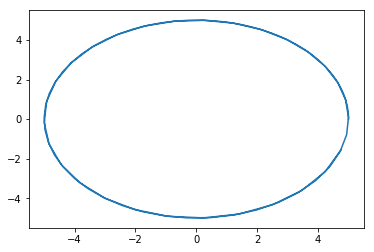

In [11]:
plt.plot(df.x,df.y)

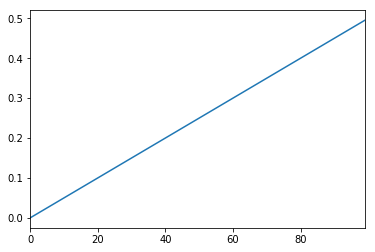

In [12]:
df.omega_z.plot()

In [13]:
df = df.set_index(time)
df.index.name='time[sec]'
df = pd.DataFrame(trajectory, columns=['yaw', 'pitch','roll','x','y','z','acc_x', 'acc_y', 'acc_z', 'omega_x', 'omega_y','omega_z'])

In [14]:
df.to_csv('acceleration_along_circle.csv')

# Accelerating along X and sin in Y direction

['yaw', 'pitch','roll','x','y','z','acc_x', 'acc_y', 'acc_z', 'omega_x', 'omega_y','omega_z'])

In [ ]:
trajectory = np.zeros((len(time),6 + 3 +3))

trajectory.shape

acc = 0.5 # g's

# acc noise

acc_measurement_noise = scipy.stats.norm(loc=0, scale=0.01).rvs(len(trajectory))


# motion noise
sigma = np.diag([0.1,0.01,0.01,0.1,0.1,0.1])
normal_noise = scipy.stats.multivariate_normal(cov=sigma)
noise = normal_noise.rvs(len(trajectory))


for i in range(len(trajectory)):
    acc_noise = np.random.rand()
    tmp = mrob.geometry.SE3([0,0,0,acc*time[i]**2/2,0,0])
    tmp.update_lhs(noise[i])
    
    trajectory[i][3] = tmp.Ln()[3]
    trajectory[i][6] = acc + acc_measurement_noise[i]